In [2]:
print('playing with data...')

playing with data...


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading ratings file
# Ignore the timestamp column
ratings = pd.read_csv('ratings.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'movie_id', 'rating'])

# Reading users file
users = pd.read_csv('users.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

# Reading movies file
movies = pd.read_csv('movies.csv', sep='\t', encoding='latin-1', usecols=['movie_id', 'title', 'genres'])

In [4]:
# Check the top 5 rows
print(ratings.head())

   user_id  movie_id  rating
0        1      1193       5
1        1       661       3
2        1       914       3
3        1      3408       4
4        1      2355       5


In [5]:
#Check ratings file info 
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656750 entries, 0 to 656749
Data columns (total 3 columns):
user_id     656750 non-null int64
movie_id    656750 non-null int64
rating      656750 non-null int64
dtypes: int64(3)
memory usage: 15.0 MB
None


In [6]:
#Check movies file info 
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
movie_id    3883 non-null int64
title       3883 non-null object
genres      3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB
None


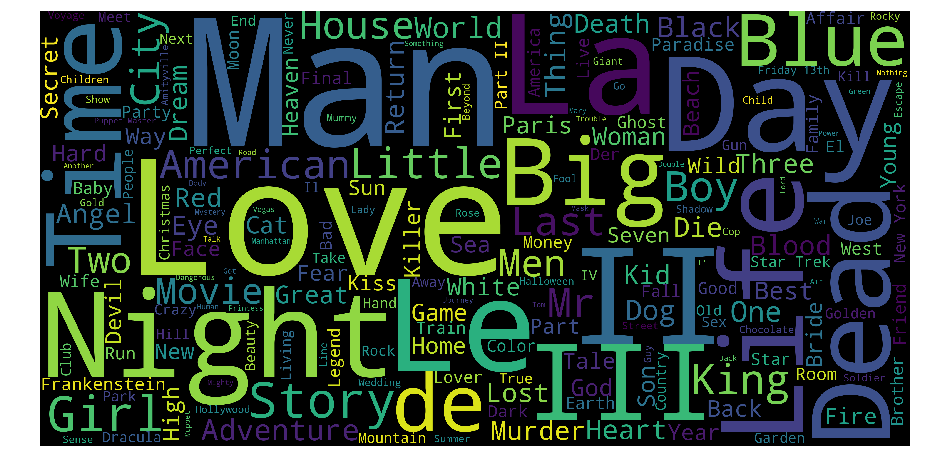

In [7]:
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Create a wordcloud of the movie titles
movies['title'] = movies['title'].fillna("").astype('str')
title_corpus = ' '.join(movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [0]:
nums = [int(s) for s in title_corpus.split() if s.isdigit()]

In [9]:
print("number of nums is " + str(len(nums)))
print("number of unique nums is " + str(len(set(nums))))

number of nums is 90
number of unique nums is 38


In [0]:
strnums = [str(i) for i in nums]

In [12]:
number_corpus = ' '.join(strnums)
print(number_corpus)

13 33 8 3 3 2 6 302 2 98 80 39 2 2 100 12 8 101 2 2 2 1600 2 2 8 187 3 2 3 2000 81 66 4 9 2 2 3 2 3 101 2 54 9000 2010 24 52 20 200 1975 10 39 400 2 3 2 8 2 2 2 4 42 2 2000 17 1 2 3 3 3 25 2000 10 28 8 2 2 8 5 7 5 4 2 2 60 13 2 2 2000 2000 2


In [13]:
yr_list = [yr[1:-1] for yr in title_corpus.split() if (yr.startswith("(") and yr.endswith(")") and len(yr) == 6 and yr[1:-1].isdigit())]
len(yr_list)

3882

In [0]:
  
def CountFrequency(my_list): 
  
    # Creating an empty dictionary  
    freq = {} 
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1

    for key, value in sorted(freq.items(), key = lambda x : x[1], reverse = True): 
        print (str(key) + " : " + str(value) + " instances") 


In [46]:
CountFrequency(yr_list) 

1996 : 345 instances
1995 : 342 instances
1998 : 337 instances
1997 : 315 instances
1999 : 283 instances
1994 : 257 instances
1993 : 165 instances
2000 : 156 instances
1986 : 104 instances
1992 : 102 instances
1990 : 77 instances
1987 : 71 instances
1988 : 69 instances
1985 : 65 instances
1991 : 60 instances
1989 : 60 instances
1984 : 60 instances
1982 : 49 instances
1981 : 43 instances
1980 : 41 instances
1983 : 35 instances
1979 : 32 instances
1978 : 30 instances
1973 : 29 instances
1974 : 28 instances
1971 : 26 instances
1963 : 25 instances
1967 : 24 instances
1977 : 22 instances
1959 : 22 instances
1968 : 22 instances
1958 : 22 instances
1972 : 22 instances
1976 : 21 instances
1975 : 21 instances
1965 : 20 instances
1962 : 20 instances
1957 : 20 instances
1940 : 19 instances
1955 : 19 instances
1956 : 19 instances
1961 : 19 instances
1969 : 18 instances
1964 : 16 instances
1970 : 16 instances
1960 : 15 instances
1954 : 15 instances
1950 : 14 instances
1953 : 14 instances
1947 : 14 

In [0]:
# from collections import Counter
# %matplotlib inline
# import wordcloud
# from wordcloud import WordCloud, STOPWORDS

#yr_counts = Counter(yr_list)
#yr_wordcloud = WordCloud(background_color='black', height=2000, width=4000).generate(str(yr_corpus))
#print(yr_counts)

# Create a wordcloud of the movie title numbers
#number_corpus = ' '.join(strnums)
#print(number_corpus)

# Create a wordcloud of the movie years
#yr_corpus = ' '.join(yr_list)
#print(yr_corpus)

#yr_wordcloud = WordCloud(background_color='black', height=2000, width=4000).generate(str(yr_corpus))

# # Plot the wordcloud
#pltyr.figure(figsize=(16,8))
#pltyr.imshow(yr_wordcloud)
#pltyr.axis('off')
#pltyr.show()

#   number_wordcloud = WordCloud(background_color='black', height=2000, width=4000).generate(number_corpus)

#   # Plot the wordcloud
#pltnum.figure(figsize=(16,8))
#pltnum.imshow(number_wordcloud)
#pltnum.axis('off')
#pltnum.show()

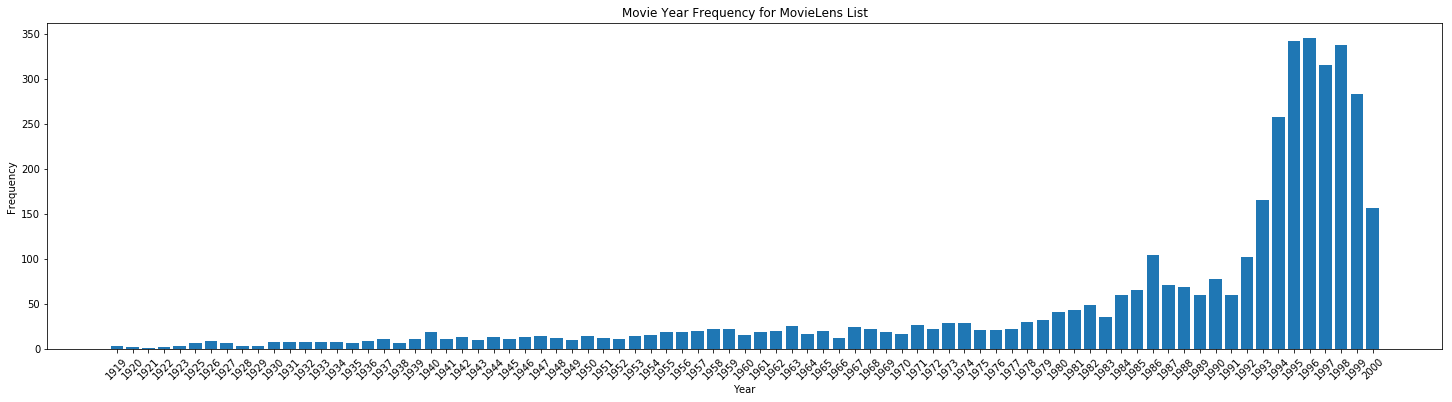

In [25]:
from collections import Counter

yr_counts = Counter(yr_list)
yc = sorted(yr_counts.items())

yr = [i[0] for i in yc]
freq = [i[1] for i in yc]

plt.bar(yr, freq)
plt.title("Movie Year Frequency for MovieLens List")
plt.xlabel("Year")
plt.ylabel("Frequency")
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.xticks(rotation = 45)
plt.show()